# Clean the log file

In [1]:
import json

from pyspark import SparkContext
from pyspark.sql import SparkSession 
from pyspark.sql.functions import col
import pyspark.sql.functions as f
from pyspark.sql.window import Window

In [22]:
original_file_name = "request.log.result1"
new_file_name = "request_result1.json"
with open(original_file_name) as in_file:
    with open(new_file_name, "wt") as out_file:
        for line in in_file.readlines():
            try:
                tmp = json.loads(line)
                out_file.write(line)
            except:
                pass

In [34]:
original_file_name = "request.log.result2"
new_file_name2 = "request_result2.json"
with open(original_file_name) as in_file:
    with open(new_file_name2, "wt") as out_file:
        for line in in_file.readlines():
            try:
                tmp = json.loads(line)
                out_file.write(line)
            except:
                pass

In [23]:
sc = SparkContext.getOrCreate()
spark = SparkSession(sc)

In [35]:
sdf = spark.read.json(new_file_name2)

# inward

In [36]:
inwards = sdf.filter(col('path').startswith('/inward'))
inwards.select("path", "lapsed_time").orderBy(col("lapsed_time").desc()).show()

+-------+-------------------+
|   path|        lapsed_time|
+-------+-------------------+
|/inward|0.43576836585998535|
|/inward| 0.4208710193634033|
|/inward| 0.4045383930206299|
|/inward| 0.3932313919067383|
|/inward| 0.3807680606842041|
|/inward| 0.3786754608154297|
|/inward|0.37462830543518066|
|/inward|0.37224292755126953|
|/inward| 0.3684699535369873|
|/inward|0.36304378509521484|
|/inward|0.36124563217163086|
|/inward|  0.357715368270874|
|/inward|0.35612916946411133|
|/inward|0.35605669021606445|
|/inward|0.35543155670166016|
|/inward|0.35368895530700684|
|/inward| 0.3485085964202881|
|/inward|0.34664058685302734|
|/inward| 0.3458690643310547|
|/inward| 0.3457818031311035|
+-------+-------------------+
only showing top 20 rows



# Start

In [37]:
starts = sdf.filter(col('path').startswith('/api/start'))
starts.select("path", "lapsed_time").orderBy(col("lapsed_time").desc()).show()

+----------+------------------+
|      path|       lapsed_time|
+----------+------------------+
|/api/start|13.196900844573975|
|/api/start| 12.52594256401062|
|/api/start|12.296721696853638|
|/api/start|12.205639600753784|
|/api/start|12.196059465408325|
|/api/start|11.787796258926392|
|/api/start|11.692582368850708|
|/api/start|11.552896499633789|
|/api/start|11.424241304397583|
|/api/start|11.397975206375122|
|/api/start| 11.38541054725647|
|/api/start|11.360492467880249|
|/api/start|11.352541208267212|
|/api/start|11.190306663513184|
|/api/start|11.097459554672241|
|/api/start|10.772967338562012|
|/api/start|10.716775178909302|
|/api/start|10.639881610870361|
|/api/start|10.540968179702759|
|/api/start|10.523723125457764|
+----------+------------------+
only showing top 20 rows



array([[<AxesSubplot:title={'center':'lapsed_time'}>]], dtype=object)

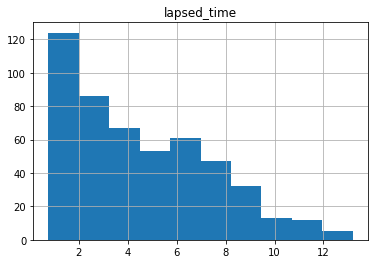

In [38]:
start_pdf = starts.toPandas()
start_pdf.hist("lapsed_time")

# Response

In [40]:
response = sdf.filter(col('path').startswith('/api/response'))
response.select("path", "lapsed_time").orderBy(col("lapsed_time").desc()).show()

+--------------------+-------------------+
|                path|        lapsed_time|
+--------------------+-------------------+
|/api/responses/20626|0.28113532066345215|
|/api/responses/20606| 0.2638874053955078|
|/api/responses/20603|0.26298093795776367|
|/api/responses/20628|  0.259169340133667|
|/api/responses/20612| 0.2558879852294922|
|/api/responses/20604|0.25369763374328613|
|/api/responses/20632| 0.2516489028930664|
|/api/responses/20618|0.24899077415466309|
|/api/responses/20632|0.24763226509094238|
|/api/responses/20623|0.24509119987487793|
|/api/responses/20607|0.24201083183288574|
|/api/responses/20629|0.24092769622802734|
|/api/responses/20608|0.23812556266784668|
|/api/responses/20610| 0.2375478744506836|
|/api/responses/20621|0.23444485664367676|
|/api/responses/20608|0.23380780220031738|
|/api/responses/20615|0.23287606239318848|
|/api/responses/20632|0.23173761367797852|
|/api/responses/20627|0.23073863983154297|
|/api/responses/20627|0.22983860969543457|
+----------

array([[<AxesSubplot:title={'center':'lapsed_time'}>]], dtype=object)

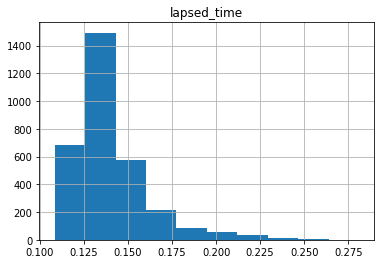

In [41]:
response_pdf = response.toPandas()
response_pdf.hist("lapsed_time")

# Rendered

In [42]:
rendered = sdf.filter(col('path').startswith('/api/rendered'))
rendered.select("path", "lapsed_time").orderBy(col("lapsed_time").desc()).show()

+-------------------+-------------------+
|               path|        lapsed_time|
+-------------------+-------------------+
|/api/rendered/20631|0.14966797828674316|
|/api/rendered/20619|0.13191628456115723|
|/api/rendered/20624|0.12714338302612305|
|/api/rendered/20611|0.12226200103759766|
|/api/rendered/20604|0.11381769180297852|
|/api/rendered/20628| 0.1110391616821289|
|/api/rendered/20626|0.11006021499633789|
|/api/rendered/20619|0.10654973983764648|
|/api/rendered/20611|0.10535192489624023|
|/api/rendered/20617|0.10137534141540527|
|/api/rendered/20619|0.09893584251403809|
|/api/rendered/20613|0.09669256210327148|
|/api/rendered/20622|0.09602046012878418|
|/api/rendered/20606|0.09487628936767578|
|/api/rendered/20620|0.09446930885314941|
|/api/rendered/20618|0.09354925155639648|
|/api/rendered/20619|0.09126162528991699|
|/api/rendered/20618|0.09073686599731445|
|/api/rendered/20611|0.09022903442382812|
|/api/rendered/20629|0.08983278274536133|
+-------------------+-------------

array([[<AxesSubplot:title={'center':'lapsed_time'}>]], dtype=object)

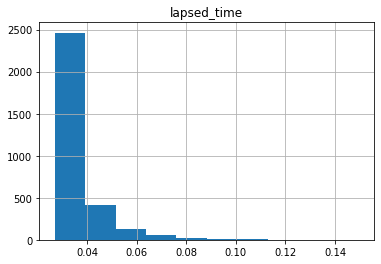

In [43]:
rendered_pdf = rendered.toPandas()
rendered_pdf.hist("lapsed_time")

In [7]:
w = Window().partitionBy('path').orderBy(col("lapsed_time").desc())
max_times = df.withColumn("rn", f.row_number().over(w)).where(col("rn")==1).select("path", "lapsed_time")

In [8]:
max_times.orderBy(col("lapsed_time").desc()).show()

+--------------------+------------------+
|                path|       lapsed_time|
+--------------------+------------------+
|          /api/start|4.9317686557769775|
|        /api/session|2.0220561027526855|
|/api/responses/20632|1.3731091022491455|
|/api/responses/20620|0.9699184894561768|
|/api/responses/20613|0.9536592960357666|
|/api/responses/20617|0.9455568790435791|
|/api/responses/20626|0.9347579479217529|
|/api/responses/20619|0.9235024452209473|
|/api/responses/20616|0.9224331378936768|
|/api/responses/20623|0.9163579940795898|
|/api/responses/20628|0.9155228137969971|
|/api/responses/20625|0.9143555164337158|
|/api/responses/20629|0.9131894111633301|
|/api/responses/20605|0.9115962982177734|
|/api/responses/20631|0.9073126316070557|
|/api/responses/20610|0.9065690040588379|
|/api/responses/20607|0.9013702869415283|
|/api/responses/20621| 0.901331901550293|
|/api/responses/20622|0.9010651111602783|
|/api/responses/20615| 0.900012731552124|
+--------------------+------------

In [14]:
df.filter(col("response_status")!=302).filter(col("response_status")!=200).select("response_status").show()

+---------------+
|response_status|
+---------------+
+---------------+

